# The easiest hardest regression problem

Once upon a meetup, I heard a reference to some work/article that was done, even while the presenter had mentioned it as an anecdote, it had this purpose: 

Neural Networks are indeed a very strong tool, but it may take a bigger neural network than you might think to approximate even the simplest non-linear equation!

They also said what the results of the article were, and what they had done in their work they presented to help with what the article had shown.

So recently, I have decided that I want to recreate the work they have mentioned as an anecdote, and this is my try.

## The Premise

We want to explore the question: what is the easiest non-trivial regression problem?

Since all regression problems can be viewed as hidden function problems, we can refine our question to ask: what is the simplest yet non-trivial function that a neural network can be tasked with approximating?

At their core, neural networks can be regarded as ensembles of linear regressions, meaning that any function that is linear or even piecewise linear could be considered trivial.

So, what is the simplest non-linear function?

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import os
os.environ["KERAS_BACKEND"] = "torch"
# %env KERAS_BACKEND=torch
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# import keras
# import keras.models
# import keras.layers

import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\User\anaconda3\envs\lior1\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


## One input

### Define the Hidden Function

For a single-input function, we can argue that the simplest non-linear function would be:

$$ y = x^2 $$

This quadratic function represents a basic form of non-linearity, making it a fundamental example for analysis.
It is non-linear at any point, but still easy to understand and has the minimal possible terms.


In [2]:

# Define the hidden function
def hidden_function(x):
    """Hidden function: y = x^2"""
    return x**2


### Make the inputs and output
including splitting to train, validation and test,
and making tests data for out of range test.

In [3]:

# --- Define parameters (assuming these might be in a previous cell) ---
a1 = -10  # Lower bound for input x
b1 = 10   # Upper bound for input x
a2 = -25 # Lower bound for mid range test for input x
b2 = 25 # Upper bound for mid range test for input x
a3 = -100 # Lower bound for long range test for input x
b3 = 100 # Upper bound for long range test for input x
# ---------------------------------------------------------------------
num_points = 10000 # Number of data points to generate
train_ratio = 0.6
test_ratio = 0.2
validation_ratio = 0.2 # Note: train_ratio + test_ratio + validation_ratio should be 1.0
# ---------------------------------------------------------------------

# Ensure parameters are defined, provide defaults if not
try:
        a1
except NameError:
        a1 = -10
try:
        b1
except NameError:
        b1 = 10
try:
        num_points
except NameError:
        num_points = 1000
try:
        train_ratio
except NameError:
        train_ratio = 0.6
try:
        test_ratio
except NameError:
        test_ratio = 0.2
try:
        validation_ratio
except NameError:
        validation_ratio = 0.2

# Generate random input points between a1 and b1
# Using uniform distribution for floats. Duplicates are highly improbable.
x_values_1_input = np.random.uniform(a1, b1, num_points)

# Calculate the corresponding y values using the hidden function
y_values_1_input = hidden_function(x_values_1_input)

# Split the data into training, testing, and validation sets
# First, split into training and the rest (test + validation)
X_train_1_input, X_temp_1_input, y_train_1_input, y_temp_1_input = train_test_split(
        x_values_1_input, y_values_1_input, test_size=(test_ratio + validation_ratio), random_state=42
)

# Second, split the rest (temp) into testing and validation
# The test_size here is the ratio of validation set size to the size of the temp set
test_val_ratio_in_temp = validation_ratio / (test_ratio + validation_ratio)
X_test_1_input, X_val_1_input, y_test_1_input, y_val_1_input = train_test_split(
        X_temp_1_input, y_temp_1_input, test_size=test_val_ratio_in_temp, random_state=42
)

# X_test_mid_range and Y_test_mid_range are for mid-range testing
X_test_mid_range_1_input = np.concatenate((np.linspace(a2, a1, num_points//2), np.linspace(b1, b2, num_points//2)))
Y_test_mid_range_1_input = hidden_function(X_test_mid_range_1_input)
# X_test_long_range and Y_test_long_range are for long-range testing
X_test_long_range_1_input = np.concatenate((np.linspace(a3, a2, num_points//2), np.linspace(b2, b3, num_points//2)))
Y_test_long_range_1_input = hidden_function(X_test_long_range_1_input)

# The data is now split into:
# X_train_1_input, y_train_1_input
# X_test_1_input, y_test_1_input
# X_val_1_input, y_val_1_input

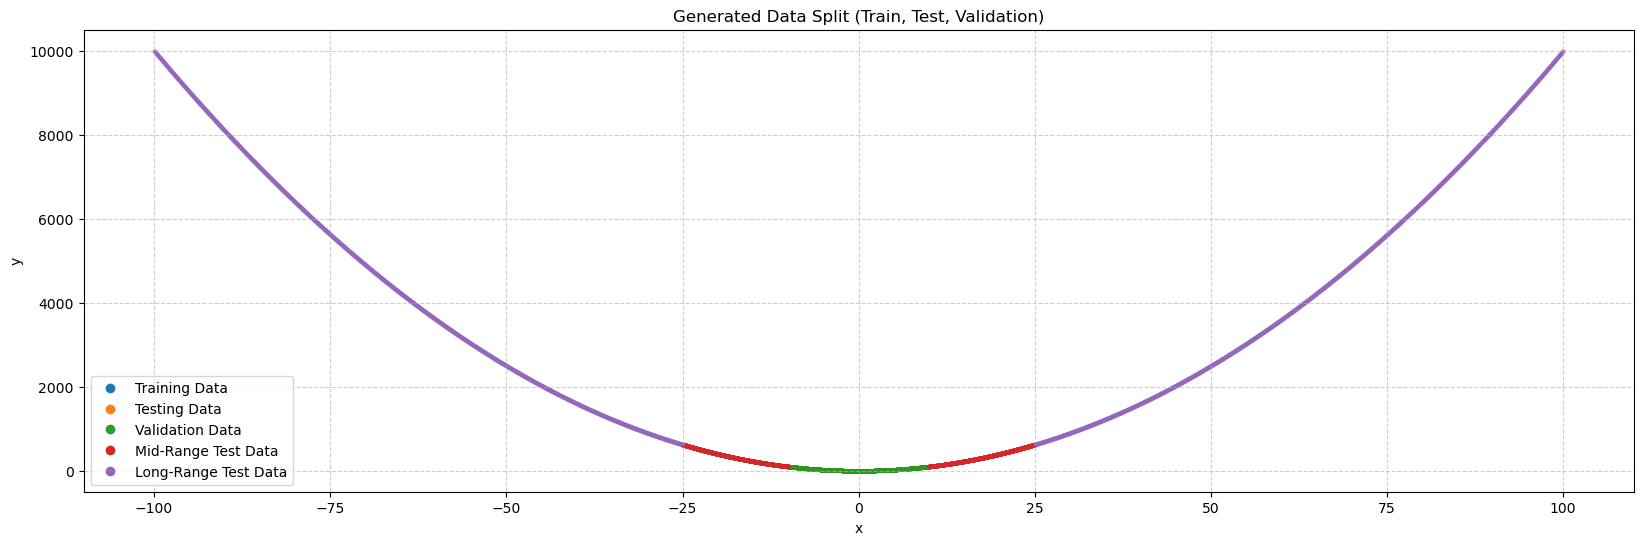

In [4]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the data points with low alpha
scatter_train = ax.scatter(X_train_1_input, y_train_1_input, alpha=0.1, s=5)
scatter_test = ax.scatter(X_test_1_input, y_test_1_input, alpha=0.1, s=5)
scatter_val = ax.scatter(X_val_1_input, y_val_1_input, alpha=0.1, s=5)
scatter_mid = ax.scatter(X_test_mid_range_1_input, Y_test_mid_range_1_input, alpha=0.1, s=5)
scatter_long = ax.scatter(X_test_long_range_1_input, Y_test_long_range_1_input, alpha=0.1, s=5)

# Create dummy plot elements with solid color for the legend
handles = []
labels = []

# Get colors from the scatter plots
color_train = scatter_train.get_facecolor()[0]
color_test = scatter_test.get_facecolor()[0]
color_val = scatter_val.get_facecolor()[0]
color_mid = scatter_mid.get_facecolor()[0]
color_long = scatter_long.get_facecolor()[0]

# Create dummy handles with alpha=1.0
dummy_train, = ax.plot([], [], 'o', color=color_train, alpha=1.0, label='Training Data')
dummy_test, = ax.plot([], [], 'o', color=color_test, alpha=1.0, label='Testing Data')
dummy_val, = ax.plot([], [], 'o', color=color_val, alpha=1.0, label='Validation Data')
dummy_mid, = ax.plot([], [], 'o', color=color_mid, alpha=1.0, label='Mid-Range Test Data')
dummy_long, = ax.plot([], [], 'o', color=color_long, alpha=1.0, label='Long-Range Test Data')

# Add dummy handles and labels to the lists
handles.extend([dummy_train, dummy_test, dummy_val, dummy_mid, dummy_long])
labels.extend(['Training Data', 'Testing Data', 'Validation Data', 'Mid-Range Test Data', 'Long-Range Test Data'])


# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Generated Data Split (Train, Test, Validation)')

# Add a legend using the dummy handles
ax.legend(handles=handles, labels=labels)

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

### Making a function to crate the networks

In [5]:

def create_mlp_model(hidden_layer_sizes: list[int], input_size:int = 1, l2_reg: float = 0.0) -> Sequential:
    """
    Creates a Keras Sequential MLP model with {input_size}(default 1) input, 1 output,
    and hidden layers of specified sizes using the PyTorch backend.

    Args:
        hidden_layer_sizes: A list of integers representing the
          number of neurons in each hidden layer.
        l2_reg: L2 regularization factor (default: 0.0, no regularization)

    Returns:
        A compiled Keras Sequential model.
    """

    model = Sequential()

    model.add(Input(shape=(input_size,), name="input_layer"))  # Input layer

    # Input layer connected to the first hidden layer
    if not hidden_layer_sizes:
        # Handle case with no hidden layers - direct input to output
        # Note: Keras 3 requires input_shape even for the first layer
        print("No hidden layers specified. Using a single output layer.")
        # model.add(Dense(input_size, input_shape=(input_size,)))  # Linear activation is default for Dense, suitable for regression
    else:
        # Add the first hidden layer (connected to input)
        model.add(Dense(hidden_layer_sizes[0], activation="relu", name="hidden_layer_1", kernel_regularizer=l2(l2_reg)))

        # Add subsequent hidden layers
        for i,size in enumerate(hidden_layer_sizes[1:], start=2):
            model.add(Dense(size, activation="relu", name=f"hidden_layer_{i}", kernel_regularizer=l2(l2_reg)))

    # Output layer
    # If there were hidden layers, add the final output layer
    if hidden_layer_sizes:
         model.add(Dense(1, name="output_layer", kernel_regularizer=l2(l2_reg))) # Linear activation is default for Dense, suitable for regression


    # Compile the model
    model.name = f"mlp_model with_{len(hidden_layer_sizes)}_hidden_layers of sizes {hidden_layer_sizes}"
    model.compile(optimizer="adam", loss="mse")

    model.summary()

    return model


### Making a function to test the created networks

Model: "mlp_model with_2_hidden_layers of sizes [10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1924.0342 - val_loss: 1466.7101
Epoch 2/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1232.5737 - val_loss: 581.8005
Epoch 3/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 456.0910 - val_loss: 230.4655
Epoch 4/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 207.2384 - val_loss: 159.7246
Epoch 5/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 155.6385 - val_loss: 145.9067
Epoch 6/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 141.0289 - val_loss: 134.2020
Epoch 7/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 131.2289 - val_loss: 123.0224
Epoch 8/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 121.9542 - val_loss: 112.4977
Epoch 9/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 110.9376 - val_loss: 101.9141
Epoch 10/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 98.4949 - val_loss: 91.9499
Epoch 11/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 91.4073 - val_loss: 82.769

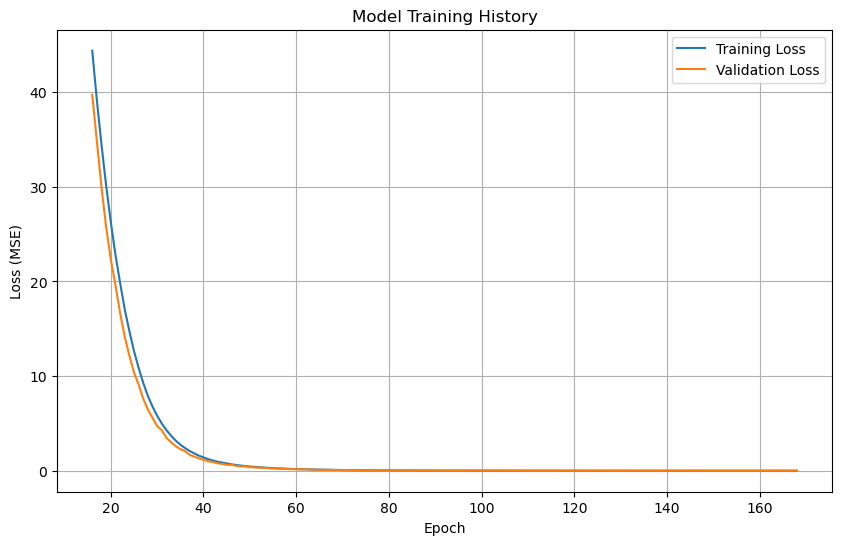

In [6]:

def test_mlp_model(model_hidden_layers: list[int],
                  X_train: np.ndarray,
                  y_train: np.ndarray,
                  X_val: np.ndarray,
                  y_val: np.ndarray,
                  X_test: np.ndarray,
                  y_test: np.ndarray,
                  X_test_mid_range: np.ndarray,
                  Y_test_mid_range: np.ndarray,
                  X_test_long_range: np.ndarray,
                  Y_test_long_range: np.ndarray,
                  epochs: int = 50,
                  batch_size: int = 32,
                  verbose: int = 1,
                  l2_reg: float = 0.0,
                  patience: int = 10,
                  plot_history: bool = True,
                  ) -> tuple[Sequential, dict, pd.Series]:
    """
    Test function to create and return a simple MLP model.
    This is a placeholder for actual model testing.
    """

    if len(X_train.shape) == 1:
        input_size = 1
    else:
        input_size = X_train.shape[1]

    # Create the model using the function defined previously
    small_model = create_mlp_model(model_hidden_layers, input_size=input_size, l2_reg=l2_reg)

    # Define the EarlyStopping callback
    # Monitor validation loss and stop if it doesn't improve for 'patience' epochs
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)


    # Train the model
    # Use validation data to monitor performance during training
    history = small_model.fit(
        X_train,
        y_train,
        epochs=epochs, # You can adjust the number of epochs
        batch_size=batch_size, # You can adjust the batch size
        validation_data=(X_val, y_val),
        callbacks=[early_stopping], # Add the EarlyStopping callback here
        verbose=verbose # Set to 1 or 2 for more detailed output during training
    )

    # Evaluate the model on the test set
    test_loss = small_model.evaluate(X_test, y_test, verbose=verbose)
    test_loss_mid_range = small_model.evaluate(X_test_mid_range, Y_test_mid_range, verbose=verbose)
    test_loss_long_range = small_model.evaluate(X_test_long_range, Y_test_long_range, verbose=verbose)

    losses = pd.Series()
    losses['on range'] = test_loss
    losses['mid range'] = test_loss_mid_range
    losses['long range'] = test_loss_long_range

    print(f"Test Loss (MSE): {test_loss}")
    print(f"Test Loss Mid-Range (MSE): {test_loss_mid_range}")
    print(f"Test Loss Long-Range (MSE): {test_loss_long_range}")

    # Optional: Plot training history
    if plot_history:
        plt.figure(figsize=(10, 6))
        start_point = len(history.history['loss'])//10  # Start plotting after 10% of epochs
        end_point = len(history.history['loss'])  # End at the last epoch
        plt.plot(range(start_point,len(history.history['loss'])),history.history['loss'][start_point:], label='Training Loss')
        plt.plot(range(start_point,end_point),history.history['val_loss'][start_point:], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.title('Model Training History')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Return the trained model and training history for further analysis if needed
    return small_model, history, losses

small_model_hidden_layers = [10,10]  # Example: two hidden layers with 10 neurons each
# Test the MLP model with the specified hidden layers
small_model, history, losses = test_mlp_model(small_model_hidden_layers,
                                              X_train_1_input, y_train_1_input,
                                              X_val_1_input, y_val_1_input,
                                              X_test_1_input, y_test_1_input,
                                              X_test_mid_range_1_input, Y_test_mid_range_1_input,
                                              X_test_long_range_1_input, Y_test_long_range_1_input,
                                              epochs=500, batch_size=32, verbose=1, plot_history=True)


### Test over a wide range of networks depths and sizes

Testing 1 layers with 10 neurons per layer...


Model: "mlp_model with_1_hidden_layers of sizes [10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
 12/188 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1848.8158 

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1779.6456 - val_loss: 1562.8521
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1421.9625 - val_loss: 1150.8646
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1054.3668 - val_loss: 771.2666
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 693.5487 - val_loss: 504.8894
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 463.9288 - val_loss: 341.9780
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 326.2838 - val_loss: 245.9168
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 244.6681 - val_loss: 192.9022
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 186.9053 - val_loss: 167.7610
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 162.4901 - val_loss: 155.5582
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 157.2268 - val_loss: 147.9701
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 145.6184 - val_loss: 141.0286
Epoc

Model: "mlp_model with_1_hidden_layers of sizes [25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1766.2318 - val_loss: 1327.3523
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1161.4081 - val_loss: 687.7572
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 550.5155 - val_loss: 292.0030
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 247.0527 - val_loss: 183.3054
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 169.8297 - val_loss: 162.1542
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 157.2924 - val_loss: 151.3498
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 148.4412 - val_loss: 141.7658
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 138.2077 - val_loss: 132.5869
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 130.5674 - val_loss: 123.8033
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 123.1090 - val_loss: 115.6061
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 111.0824 - val_loss: 106

Model: "mlp_model with_1_hidden_layers of sizes [50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1930.6077 - val_loss: 1275.0511
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1055.7223 - val_loss: 476.7872
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 389.4577 - val_loss: 198.5475
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 189.5195 - val_loss: 160.7085
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 154.3463 - val_loss: 146.7634
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 144.2867 - val_loss: 134.8037
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 130.2438 - val_loss: 123.4562
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 119.7715 - val_loss: 112.7383
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 108.5478 - val_loss: 102.3674
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 99.4549 - val_loss: 92.7157
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 91.4831 - val_loss: 83.848

Model: "mlp_model with_1_hidden_layers of sizes [75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226 (904.00 B)

 Trainable params: 226 (904.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1649.2100 - val_loss: 908.8234
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 651.8541 - val_loss: 211.9897
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 184.8322 - val_loss: 157.1844
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 152.7464 - val_loss: 140.8343
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 138.5536 - val_loss: 126.9229
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 120.5733 - val_loss: 113.7038
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 110.9326 - val_loss: 101.3867
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 100.6291 - val_loss: 89.4027
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 86.1482 - val_loss: 79.1840
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 76.0230 - val_loss: 68.8325
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 67.4194 - val_loss: 60.1715
Epo

Model: "mlp_model with_1_hidden_layers of sizes [100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1666.8594 - val_loss: 853.7327
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 609.3120 - val_loss: 212.2590
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 179.8428 - val_loss: 155.8132
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 146.7684 - val_loss: 138.4377
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 130.6900 - val_loss: 123.3787
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 120.6944 - val_loss: 109.5554
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 102.6909 - val_loss: 96.8083
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 90.5532 - val_loss: 84.1798
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 79.7842 - val_loss: 72.8047
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 70.1134 - val_loss: 62.7229
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 61.5537 - val_loss: 54.2044
Epoch

Model: "mlp_model with_2_hidden_layers of sizes [10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1814.6178 - val_loss: 1237.6211
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 925.9814 - val_loss: 258.0475
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 193.4351 - val_loss: 148.9462
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 141.7166 - val_loss: 127.4912
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 120.4310 - val_loss: 104.8164
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 96.4582 - val_loss: 85.6288
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 82.2979 - val_loss: 71.8274
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 67.5268 - val_loss: 62.4380
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 60.7567 - val_loss: 57.2794
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 54.0529 - val_loss: 53.4650
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 51.7850 - val_loss: 51.4679
Epoch 1

Model: "mlp_model with_2_hidden_layers of sizes [25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 726 (2.84 KB)

 Trainable params: 726 (2.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1652.7670 - val_loss: 507.0655
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 280.9220 - val_loss: 135.1051
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 121.4667 - val_loss: 101.6826
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 94.5213 - val_loss: 74.0929
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 68.5553 - val_loss: 56.2615
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 51.2593 - val_loss: 42.4070
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 37.4728 - val_loss: 29.3807
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 25.9090 - val_loss: 19.9509
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 17.1326 - val_loss: 12.7010
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.0079 - val_loss: 8.1033
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.3848 - val_loss: 5.4562
Epoch 12/100
18

Model: "mlp_model with_2_hidden_layers of sizes [50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1239.2952 - val_loss: 149.1643
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 139.5012 - val_loss: 113.1262
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 101.4466 - val_loss: 77.4769
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 72.9386 - val_loss: 51.8744
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 46.6406 - val_loss: 34.4428
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 31.2774 - val_loss: 24.7906
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 23.2989 - val_loss: 17.3547
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 16.2528 - val_loss: 12.4355
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 11.6931 - val_loss: 8.1499
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.7063 - val_loss: 5.3020
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.9577 - val_loss: 3.5032
Epoch 12/100
188/1

Model: "mlp_model with_2_hidden_layers of sizes [75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,926 (23.15 KB)

 Trainable params: 5,926 (23.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1228.0638 - val_loss: 142.6268
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 130.7575 - val_loss: 100.2595
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 88.2299 - val_loss: 58.1171
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 50.5788 - val_loss: 28.6527
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 24.7729 - val_loss: 12.9030
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.6385 - val_loss: 5.9198
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.1231 - val_loss: 3.0663
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6050 - val_loss: 1.7332
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5428 - val_loss: 1.3158
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0856 - val_loss: 0.9327
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6507 - val_loss: 0.4965
Epoch 12/100
188/188 ━━━━

Model: "mlp_model with_2_hidden_layers of sizes [100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1058.6003 - val_loss: 133.6077
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 121.2315 - val_loss: 91.4883
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 78.9513 - val_loss: 48.7884
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 39.9722 - val_loss: 20.2065
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 14.9200 - val_loss: 6.9873
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.0114 - val_loss: 2.9805
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6767 - val_loss: 1.3843
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3230 - val_loss: 0.9422
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7738 - val_loss: 0.5128
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4720 - val_loss: 0.2966
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3110 - val_loss: 0.2455
Epoch 12/100
188/188 ━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1897.7603 - val_loss: 1103.7930
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 652.2101 - val_loss: 159.7805
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 151.9439 - val_loss: 132.9599
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 128.1643 - val_loss: 109.9356
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 101.5406 - val_loss: 88.7958
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 86.2760 - val_loss: 72.1946
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 68.7772 - val_loss: 59.6264
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 57.4023 - val_loss: 49.5651
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 48.8792 - val_loss: 43.1569
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 41.7258 - val_loss: 37.7192
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 37.2647 - val_loss: 33.5431
Epoch 12

Model: "mlp_model with_3_hidden_layers of sizes [25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,376 (5.38 KB)

 Trainable params: 1,376 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1341.7010 - val_loss: 145.9577
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 132.3577 - val_loss: 98.0198
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 86.4400 - val_loss: 45.3404
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 35.6738 - val_loss: 14.8825
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.1099 - val_loss: 5.4558
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.8312 - val_loss: 2.6330
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.2565 - val_loss: 1.2756
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1380 - val_loss: 0.7451
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7114 - val_loss: 0.4125
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4492 - val_loss: 0.3274
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2968 - val_loss: 0.3125
Epoch 12/100
188/188 ━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,251 (20.51 KB)

 Trainable params: 5,251 (20.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1226.5623 - val_loss: 130.3720
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 113.9682 - val_loss: 73.1235
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 54.3672 - val_loss: 16.3348
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.3382 - val_loss: 4.0877
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.1013 - val_loss: 1.4220
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1757 - val_loss: 0.6979
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6517 - val_loss: 0.3902
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3650 - val_loss: 0.2766
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2193 - val_loss: 0.1540
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1747 - val_loss: 0.2404
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1112 - val_loss: 0.0648
Epoch 12/100
188/188 ━━━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,626 (45.41 KB)

 Trainable params: 11,626 (45.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1060.0327 - val_loss: 111.6472
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 93.9767 - val_loss: 39.1385
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 27.2229 - val_loss: 5.7892
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7880 - val_loss: 1.5472
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5924 - val_loss: 0.5645
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6058 - val_loss: 0.2964
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2707 - val_loss: 0.1873
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1823 - val_loss: 0.1010
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1253 - val_loss: 0.0628
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0771 - val_loss: 0.0524
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0619 - val_loss: 0.1321
Epoch 12/100
188/188 ━━━━━━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,501 (80.08 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 964.3288 - val_loss: 99.2369
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 77.9462 - val_loss: 19.7300
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.1549 - val_loss: 1.6832
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3826 - val_loss: 0.6409
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4752 - val_loss: 0.2503
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2446 - val_loss: 0.2315
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1760 - val_loss: 0.1459
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1529 - val_loss: 0.0411
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0647 - val_loss: 0.0842
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0596 - val_loss: 0.0517
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0463 - val_loss: 0.0357
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1708.9243 - val_loss: 254.8611
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 180.3651 - val_loss: 115.4893
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 100.1837 - val_loss: 58.1394
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 46.3062 - val_loss: 24.8982
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 19.9397 - val_loss: 11.6453
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9577 - val_loss: 5.4471
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.4623 - val_loss: 3.4072
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4180 - val_loss: 2.1175
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7512 - val_loss: 1.5970
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1067 - val_loss: 1.0638
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8491 - val_loss: 0.6879
Epoch 12/100
188/188 ━━━━

Model: "mlp_model with_4_hidden_layers of sizes [25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,026 (7.91 KB)

 Trainable params: 2,026 (7.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1734.9768 - val_loss: 149.1438
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 121.0408 - val_loss: 59.3807
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 42.8189 - val_loss: 11.8980
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.7596 - val_loss: 2.3811
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9410 - val_loss: 1.2896
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9521 - val_loss: 0.4316
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4034 - val_loss: 0.2417
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2401 - val_loss: 0.1551
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1508 - val_loss: 0.1006
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1012 - val_loss: 0.1054
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0851 - val_loss: 0.0827
Epoch 12/100
188/188 ━━━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,801 (30.47 KB)

 Trainable params: 7,801 (30.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1110.4657 - val_loss: 100.6683
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 68.8957 - val_loss: 6.5938
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.3440 - val_loss: 1.3818
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7951 - val_loss: 0.5568
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3566 - val_loss: 0.7497
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3841 - val_loss: 0.0631
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1359 - val_loss: 0.0831
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1273 - val_loss: 0.1231
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0793 - val_loss: 0.0994
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0934 - val_loss: 0.0286
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0443 - val_loss: 0.0787
Epoch 12/100
188/188 ━━━━━━━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,326 (67.68 KB)

 Trainable params: 17,326 (67.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 778.2516 - val_loss: 76.2093
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 41.2677 - val_loss: 3.4413
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.9545 - val_loss: 3.3509
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.1321 - val_loss: 0.5126
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3863 - val_loss: 0.1906
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1297 - val_loss: 0.0671
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1818 - val_loss: 0.1216
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1114 - val_loss: 0.1803
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1498 - val_loss: 0.1195
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0834 - val_loss: 1.4112
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2787 - val_loss: 0.0606
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,601 (119.54 KB)

 Trainable params: 30,601 (119.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 794.5202 - val_loss: 76.6630
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 48.4516 - val_loss: 2.7702
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3939 - val_loss: 1.2855
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4517 - val_loss: 2.2993
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.4630 - val_loss: 0.1360
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2254 - val_loss: 0.0787
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1261 - val_loss: 0.1266
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3967 - val_loss: 1.0192
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.7921 - val_loss: 0.1357
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3237 - val_loss: 0.0246
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0587 - val_loss: 0.0627
Epoch 12/100
188/188 ━━━━━━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471 (1.84 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1875.9248 - val_loss: 584.9445
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 265.8474 - val_loss: 147.6161
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 134.1411 - val_loss: 102.4308
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 91.3822 - val_loss: 56.0679
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 47.2412 - val_loss: 24.8046
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 21.8175 - val_loss: 12.8029
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.9469 - val_loss: 6.0158
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.3367 - val_loss: 3.2217
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.8713 - val_loss: 1.6125
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4705 - val_loss: 0.8772
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.8747 - val_loss: 0.5122
Epoch 12/100
188/188

Model: "mlp_model with_5_hidden_layers of sizes [25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,676 (10.45 KB)

 Trainable params: 2,676 (10.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1390.6178 - val_loss: 130.3140
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 111.2952 - val_loss: 17.1816
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 11.0624 - val_loss: 1.8333
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4666 - val_loss: 0.7080
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4826 - val_loss: 0.1908
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3966 - val_loss: 0.2179
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1484 - val_loss: 0.1620
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1904 - val_loss: 0.1404
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1111 - val_loss: 0.1137
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0981 - val_loss: 1.2771
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3755 - val_loss: 0.0943
Epoch 12/100
188/188 ━━━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,351 (40.43 KB)

 Trainable params: 10,351 (40.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1120.4292 - val_loss: 106.4399
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 77.8788 - val_loss: 16.5487
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.5812 - val_loss: 1.1192
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0323 - val_loss: 0.3828
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2938 - val_loss: 0.1996
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2227 - val_loss: 0.0807
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1014 - val_loss: 0.0887
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0798 - val_loss: 0.0367
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0589 - val_loss: 0.0480
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0587 - val_loss: 0.0634
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2229 - val_loss: 0.1275
Epoch 12/100
188/188 ━━━━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,026 (89.95 KB)

 Trainable params: 23,026 (89.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 891.6119 - val_loss: 61.5469
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 31.9679 - val_loss: 7.8396
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0071 - val_loss: 0.4282
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5068 - val_loss: 0.2537
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2405 - val_loss: 0.3218
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2208 - val_loss: 0.1829
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.9225 - val_loss: 0.1739
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2555 - val_loss: 0.0983
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4474 - val_loss: 0.1446
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1509 - val_loss: 0.2531
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0792 - val_loss: 0.2794
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,701 (158.99 KB)

 Trainable params: 40,701 (158.99 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 757.9619 - val_loss: 35.3412
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 20.9013 - val_loss: 1.1732
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2088 - val_loss: 0.3447
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2710 - val_loss: 0.1426
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0009 - val_loss: 0.9747
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.8886 - val_loss: 1.4281
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3896 - val_loss: 0.1038
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3445 - val_loss: 0.0660
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1706 - val_loss: 0.2526
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.5287 - val_loss: 1.5730
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3888 - val_loss: 0.0956
Epoch 12/100
188/188 ━━━━━━━━━━

Model: "mlp_model with_6_hidden_layers of sizes [10, 10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1698.2513 - val_loss: 193.1934
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 170.1820 - val_loss: 111.0273
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 91.9959 - val_loss: 52.7355
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 38.9568 - val_loss: 18.3040
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 12.0566 - val_loss: 4.0642
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.6268 - val_loss: 2.0741
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.6021 - val_loss: 1.0027
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.9195 - val_loss: 0.8291
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6786 - val_loss: 0.4662
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4685 - val_loss: 0.3244
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3259 - val_loss: 0.2401
Epoch 12/100
188/18

Model: "mlp_model with_6_hidden_layers of sizes [25, 25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,326 (12.99 KB)

 Trainable params: 3,326 (12.99 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1214.4308 - val_loss: 109.3831
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 88.9987 - val_loss: 16.8637
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 9.2991 - val_loss: 1.6030
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.1683 - val_loss: 0.4140
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3381 - val_loss: 0.2609
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3822 - val_loss: 0.3084
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1929 - val_loss: 0.2188
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1405 - val_loss: 0.0470
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0754 - val_loss: 0.0368
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0534 - val_loss: 0.5315
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2733 - val_loss: 0.0658
Epoch 12/100
188/188 ━━━━━━

Model: "mlp_model with_6_hidden_layers of sizes [50, 50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,901 (50.39 KB)

 Trainable params: 12,901 (50.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 991.2008 - val_loss: 72.9467
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 37.6807 - val_loss: 4.2503
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.5228 - val_loss: 4.2574
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4139 - val_loss: 0.2022
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1445 - val_loss: 0.2781
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1862 - val_loss: 0.6105
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.1318 - val_loss: 0.0468
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3619 - val_loss: 0.7271
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6434 - val_loss: 0.3558
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1023 - val_loss: 0.1213
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1926 - val_loss: 0.3641
Epoch 12/100
188/188 ━━━━━━━

Model: "mlp_model with_6_hidden_layers of sizes [75, 75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,726 (112.21 KB)

 Trainable params: 28,726 (112.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 721.0593 - val_loss: 52.5882
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 25.6685 - val_loss: 1.2574
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.1425 - val_loss: 0.4156
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3844 - val_loss: 0.2090
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2298 - val_loss: 0.7629
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5365 - val_loss: 3.7048
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.5955 - val_loss: 0.1846
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1887 - val_loss: 0.1145
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2050 - val_loss: 0.4820
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1243 - val_loss: 0.0946
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.5552 - val_loss: 0.1535
Epoch 12/100
188/188 ━━━━━

Model: "mlp_model with_6_hidden_layers of sizes [100, 100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,801 (198.44 KB)

 Trainable params: 50,801 (198.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 708.8999 - val_loss: 27.8504
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 13.6436 - val_loss: 0.5486
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.7299 - val_loss: 0.6438
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5212 - val_loss: 3.7017
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.8258 - val_loss: 0.3271
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2612 - val_loss: 0.1357
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1763 - val_loss: 0.0649
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6069 - val_loss: 0.0741
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1542 - val_loss: 0.1890
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5089 - val_loss: 0.1511
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2715 - val_loss: 0.1915
Epoch 12/100
188/188 ━━━━━

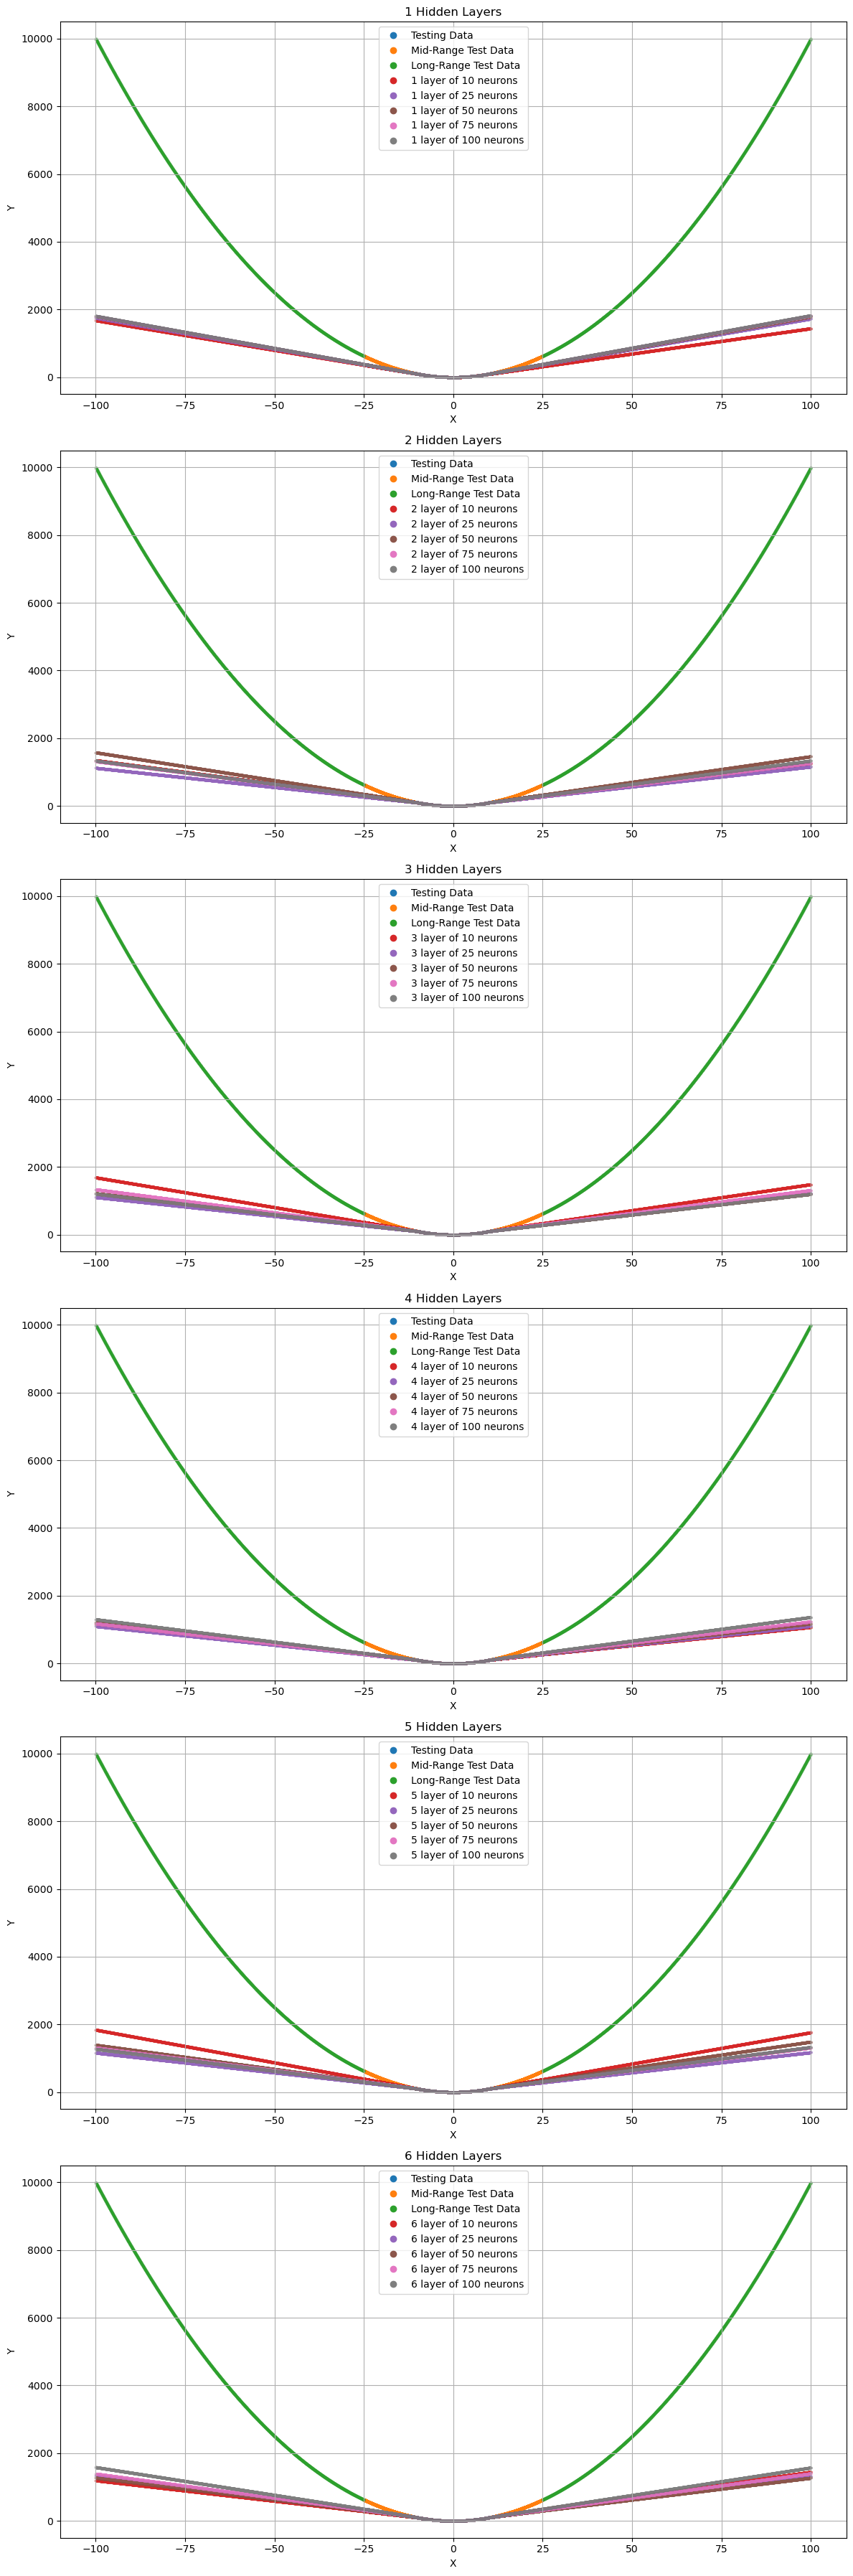


--- Test Results Summary ---
    num_layers  neurons_per_layer  loss_on_range  loss_mid_range  \
0            1                 10       1.011438    18221.003906   
1            1                 25       0.015813    13407.376953   
2            1                 50       0.001924    12280.571289   
3            1                 75       0.000694    11945.656250   
4            1                100       0.000725    11777.142578   
5            2                 10       0.163028    23431.822266   
6            2                 25       0.015586    29699.011719   
7            2                 50       0.002301    18568.392578   
8            2                 75       0.002104    24972.701172   
9            2                100       0.001203    23684.582031   
10           3                 10       0.047061    16419.921875   
11           3                 25       0.030848    27965.162109   
12           3                 50       0.017717    26422.718750   
13           3    

In [7]:
# Define the range of hidden layers and neurons per layer to test
num_layers_list = range(1, 7) # 1 to 6 hidden layers
neurons_list = [10, 25, 50, 75, 100] # Number of neurons in each layer

# List to store results
results_list = []
loss_on_range_1_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_mid_range_1_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_long_range_1_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(num_layers_list), 1, figsize=(12, 6 * len(num_layers_list)))
total_x_range = np.concatenate((X_test_1_input, X_test_mid_range_1_input, X_test_long_range_1_input))
# total_y_range = np.concatenate((y_test_1_input, Y_test_mid_range_1_input, Y_test_long_range_1_input)) # This variable is not used in the plot

# Loop through each combination of layers and neurons
for i, num_layers in enumerate(num_layers_list):

    # Get the correct axes object based on the number of subplots
    if len(num_layers_list) == 1:
        ax = axes
    else:
        ax = axes[i]

    # Plot the static data points with low alpha
    handles, labels = ax.get_legend_handles_labels()
    real_data = ax.scatter(X_test_1_input, y_test_1_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Testing Data')
    handles.append(dummy_handle)
    labels.append(f'Testing Data')
    real_data = ax.scatter(X_test_mid_range_1_input, Y_test_mid_range_1_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Mid-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Mid-Range Test Data')
    real_data = ax.scatter(X_test_long_range_1_input, Y_test_long_range_1_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Long-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Long-Range Test Data')

    # Lists to store handles and labels for the legend
    # Get handles/labels from static data plots first
    handles, labels = ax.get_legend_handles_labels()

    for neurons_per_layer in neurons_list:
        print(f"Testing {num_layers} layers with {neurons_per_layer} neurons per layer...")

        # Define the hidden layer sizes for the current configuration
        hidden_layer_sizes = [neurons_per_layer] * num_layers

        # Create the model using the function defined previously
        # Note: create_mlp_model prints model summary, which will appear for each model
        model, history, losses = test_mlp_model(hidden_layer_sizes,
                                                X_train_1_input, y_train_1_input,
                                                X_val_1_input, y_val_1_input,
                                                X_test_1_input, y_test_1_input,
                                                X_test_mid_range_1_input, Y_test_mid_range_1_input,
                                                X_test_long_range_1_input, Y_test_long_range_1_input,
                                                epochs=100, batch_size=32, verbose=1, 
                                                l2_reg=0.0, plot_history=False)
        
        
        loss_on_range_1_input.loc[num_layers, neurons_per_layer] = losses['on range']
        loss_mid_range_1_input.loc[num_layers, neurons_per_layer] = losses['mid range']
        loss_long_range_1_input.loc[num_layers, neurons_per_layer] = losses['long range']

        # plot the test results with low alpha
        scatter_pred = ax.scatter(total_x_range, model.predict(total_x_range, verbose=0), alpha=0.1, s=5)

        # Get the color used for this scatter plot
        color = scatter_pred.get_facecolor()[0]

        # Create a dummy plot element with alpha=1.0 for the legend handle
        # Use a line plot with a marker for the legend handle
        dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'{num_layers} layer of {neurons_per_layer} neurons')

        # Add the dummy handle and label to the lists
        handles.append(dummy_handle)
        labels.append(f'{num_layers} layer of {neurons_per_layer} neurons')


        # Store the results in a dictionary
        results_list.append({
            'num_layers': num_layers,
            'neurons_per_layer': neurons_per_layer,
            'loss_on_range': losses['on range'],
            'loss_mid_range': losses['mid range'],
            'loss_long_range': losses['long range']
        })

    # # Set the y-axis to log scale
    # ax.set_yscale('log')

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y') 
    # ax.set_ylabel('Y (log scale)') # Update label to reflect log scale
    ax.set_title(f'{num_layers} Hidden Layers')

    # Add the legend using the collected handles and labels
    ax.legend(handles=handles, labels=labels)

    ax.grid(True)

plt.tight_layout()
plt.show()

# Convert the list of results into a pandas DataFrame
results_df = pd.DataFrame(results_list)

# Display the resulting DataFrame
print("\n--- Test Results Summary ---")
print(results_df)

#### Compare predictions errors on range and out of range

Text(70.72222222222221, 0.5, 'Number of Hidden Layers')

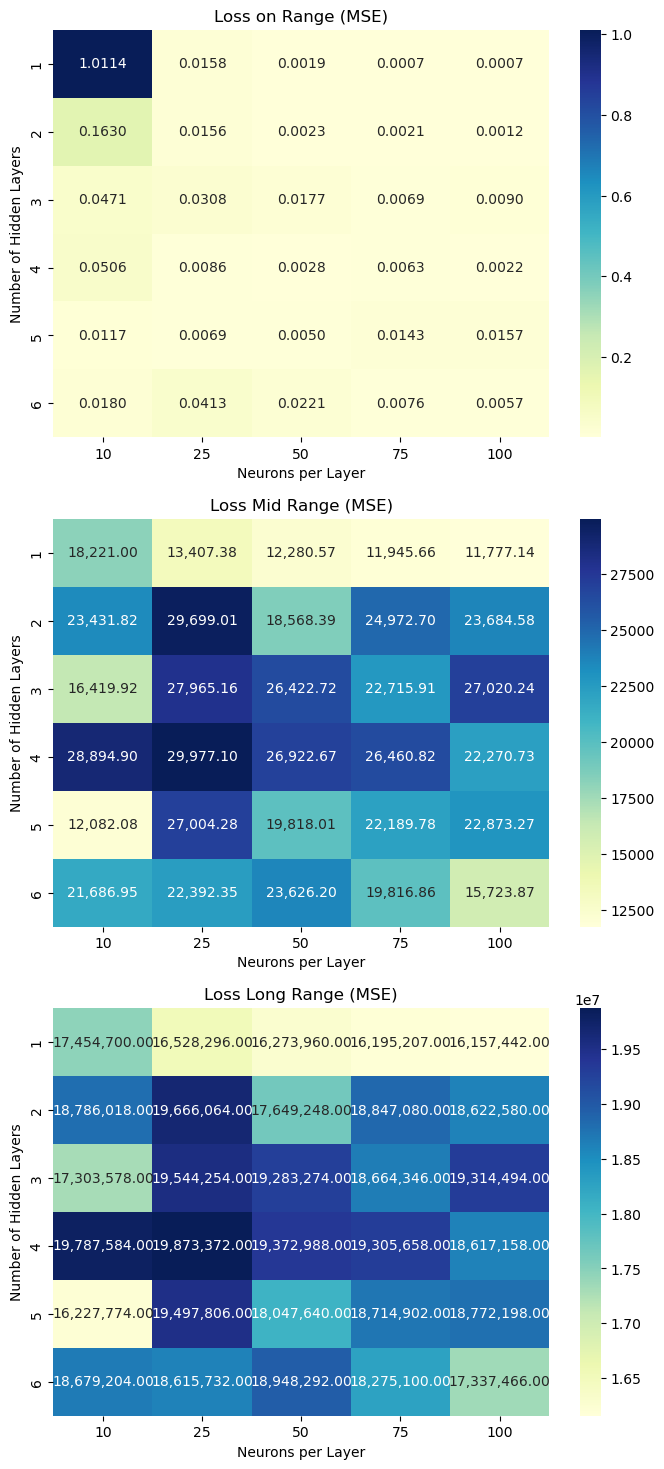

In [8]:
# loss_on_range.info()
# loss_mid_range
# loss_long_range

fig, axes = plt.subplots(3, 1, figsize=(8, 3 * len(num_layers_list)))

sns.heatmap(loss_on_range_1_input, annot=True, fmt=",.4f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Loss on Range (MSE)")
axes[0].set_xlabel("Neurons per Layer")
axes[0].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_mid_range_1_input, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Loss Mid Range (MSE)")
axes[1].set_xlabel("Neurons per Layer")
axes[1].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_long_range_1_input, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Loss Long Range (MSE)")
axes[2].set_xlabel("Neurons per Layer")
axes[2].set_ylabel("Number of Hidden Layers")
# plt.show()


### One input conclusion

The results we got for the one input case are a little different then what we have been told to expect.
In our tests we didn't saw the strong corelation between network size or depth to its quality like we were told should happen, and even the connection between layers size and quality is not dramatic.
we got pretty good on-range results from network at the small end of the tested network sizes.

But the results we got on the out-of-range data have shown that non of the networks had truly generalized (even when we given it the simplest function we could). 
The out-of-range outputs show that out of range all the networks do a linear interpolation of the closest points, that doesn't really work for the truly non-linear function we had as an hidden function.

## Two inputs

### Define the Hidden Function

For a two-input function, we can argue that the simplest non-linear function would be:

$$ z = x*y $$

This quadratic function represents a basic form of non-linearity, making it a fundamental example for analysis.
Having second powers by their own will be similar to a combination of the one-input case, so not interesting, and this is the simplest form of non-linear inputs interaction.


In [9]:

# Define the hidden function
def hidden_function2(x, y):
    """Hidden function: z = x*y"""
    return x*y

### Make the inputs and output
including splitting to train, validation and test,
and making tests data for out of range test.

In [10]:
# --- Define parameters (assuming these might be in a previous cell) ---
a1 = -10  # Lower bound for input x
b1 = 10   # Upper bound for input x
a2 = -25 # Lower bound for mid range test for input x
b2 = 25 # Upper bound for mid range test for input x
a3 = -100 # Lower bound for long range test for input x
b3 = 100 # Upper bound for long range test for input x
# ---------------------------------------------------------------------
num_points = 10000 # Number of data points to generate
train_ratio = 0.6
test_ratio = 0.2
validation_ratio = 0.2 # Note: train_ratio + test_ratio + validation_ratio should be 1.0
# ---------------------------------------------------------------------

# Ensure parameters are defined, provide defaults if not
try:
        a1
except NameError:
        a1 = -10
try:
        b1
except NameError:
        b1 = 10
try:
        num_points
except NameError:
        num_points = 1000
try:
        train_ratio
except NameError:
        train_ratio = 0.6
try:
        test_ratio
except NameError:
        test_ratio = 0.2
try:
        validation_ratio
except NameError:
        validation_ratio = 0.2

# Generate random input points between a1 and b1
# Using uniform distribution for floats. Duplicates are highly improbable.
x_values_2_input = np.random.uniform(a1, b1, (num_points, 2))

# Calculate the corresponding y values using the hidden function
y_values_2_input = hidden_function2(x_values_2_input[:, 0], x_values_2_input[:, 1])

# Split the data into training, testing, and validation sets
# First, split into training and the rest (test + validation)
X_train_2_input, X_temp_2_input, y_train_2_input, y_temp_2_input = train_test_split(
        x_values_2_input, y_values_2_input, test_size=(test_ratio + validation_ratio), random_state=42
)

# Second, split the rest (temp) into testing and validation
# The test_size here is the ratio of validation set size to the size of the temp set
test_val_ratio_in_temp = validation_ratio / (test_ratio + validation_ratio)
X_test_2_input, X_val_2_input, y_test_2_input, y_val_2_input = train_test_split(
        X_temp_2_input, y_temp_2_input, test_size=test_val_ratio_in_temp, random_state=42
)

# X_test_mid_range and Y_test_mid_range are for mid-range testing
# X_test_mid_range = np.concatenate((np.random.uniform([a2, a2], [a1, a1], (num_points//4, 2)), np.random.uniform([b1, b1], [b2, b2], (num_points//4, 2)), np.random.uniform([a2, b1], [a1, b2], (num_points//4, 2)), np.random.uniform([b1, a2], [b2, a1], (num_points//4, 2))), axis=0)
X_test_mid_range_2_input = np.concatenate((np.random.uniform([a2, a2], [a1, b2], (num_points//4, 2)), np.random.uniform([b1, a2], [b2, b2], (num_points//4, 2)), np.random.uniform([a2, b1], [b2, b2], (num_points//4, 2)), np.random.uniform([a2, a2], [b2, a1], (num_points//4, 2))), axis=0)
Y_test_mid_range_2_input = hidden_function2(X_test_mid_range_2_input[:, 0], X_test_mid_range_2_input[:, 1])
# X_test_long_range and Y_test_long_range are for long-range testing
# X_test_long_range = np.concatenate((np.random.uniform([a3, a3], [a2, a2], (num_points//4, 2)), np.random.uniform([b2, b2], [b3, b3], (num_points//4, 2)), np.random.uniform([a3, b2], [a2, b3], (num_points//4, 2)), np.random.uniform([b2, a3], [b3, a2], (num_points//4, 2))), axis=0)
X_test_long_range_2_input = np.concatenate((np.random.uniform([a3, a3], [a2, b3], (num_points//4, 2)), np.random.uniform([b2, a3], [b3, b3], (num_points//4, 2)), np.random.uniform([a3, b2], [b3, b3], (num_points//4, 2)), np.random.uniform([a3, a3], [b3, a2], (num_points//4, 2))), axis=0)
Y_test_long_range_2_input = hidden_function2(X_test_long_range_2_input[:, 0], X_test_long_range_2_input[:, 1])

# The data is now split into:
# X_train_2_input, y_train_2_input
# X_test_2_input, y_test_2_input
# X_val_2_input, y_val_2_input
# X_test_mid_range_2_input, Y_test_mid_range_2_input
# X_test_long_range_2_input, Y_test_long_range_2_input

In [11]:
# x_test_mid_range_1 = np.random.uniform([a2, a2], [a1, a1], (num_points//4, 2))
# x_test_mid_range_2 = np.random.uniform([b1, b1], [b2, b2], (num_points//4, 2))
# x_test_mid_range_3 = np.random.uniform([a2, b1], [a1, b2], (num_points//4, 2))
# x_test_mid_range_4 = np.random.uniform([b1, a2], [b2, a1], (num_points//4, 2))

# X_test_mid_range = np.concatenate((x_test_mid_range_1, x_test_mid_range_2, x_test_mid_range_3, x_test_mid_range_4), axis=0)
# Y_test_mid_range = hidden_function2(X_test_mid_range[:, 0], X_test_mid_range[:, 1])

X_test_mid_range_2_input.shape, Y_test_mid_range_2_input.shape


((10000, 2), (10000,))

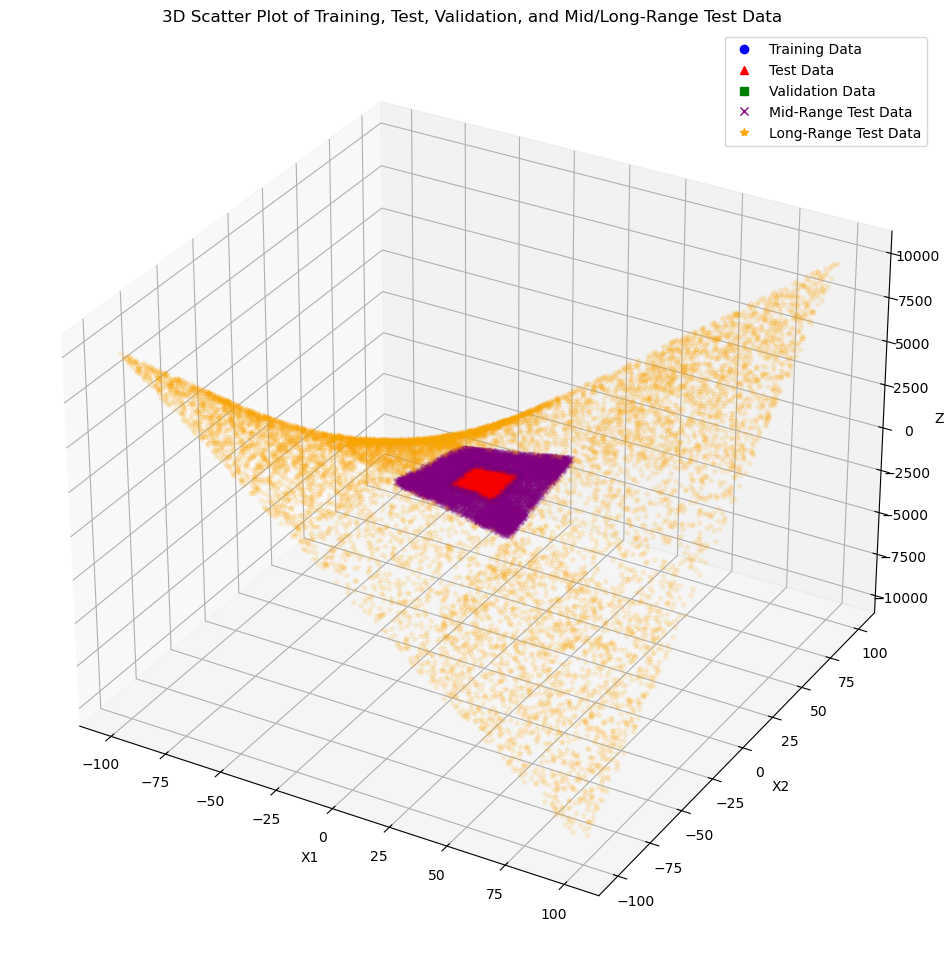

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points with low alpha
scatter_train = ax.scatter(X_train_2_input[:, 0], X_train_2_input[:, 1], y_train_2_input, c='blue', marker='o', alpha=0.1)
scatter_test = ax.scatter(X_test_2_input[:, 0], X_test_2_input[:, 1], y_test_2_input, c='red', marker='^', alpha=0.1)
scatter_val = ax.scatter(X_val_2_input[:, 0], X_val_2_input[:, 1], y_val_2_input, c='green', marker='s', alpha=0.1)
scatter_mid = ax.scatter(X_test_mid_range_2_input[:, 0], X_test_mid_range_2_input[:, 1], Y_test_mid_range_2_input, c='purple', marker='x', alpha=0.1)
scatter_long = ax.scatter(X_test_long_range_2_input[:, 0], X_test_long_range_2_input[:, 1], Y_test_long_range_2_input, c='orange', marker='*', alpha=0.1)

# Create dummy plot elements with solid color for the legend
handles = []
labels = []

# Get colors from the scatter plots (or define them explicitly)
color_train = scatter_train.get_facecolor()[0] # Or use 'blue'
color_test = scatter_test.get_facecolor()[0]   # Or use 'red'
color_val = scatter_val.get_facecolor()[0]     # Or use 'green'
color_mid = scatter_mid.get_facecolor()[0]     # Or use 'purple'
color_long = scatter_long.get_facecolor()[0]   # Or use 'orange'

# Create dummy handles with alpha=1.0 and appropriate markers
dummy_train, = ax.plot([], [], 'o', color=color_train, alpha=1.0, label='Training Data')
dummy_test, = ax.plot([], [], '^', color=color_test, alpha=1.0, label='Test Data')
dummy_val, = ax.plot([], [], 's', color=color_val, alpha=1.0, label='Validation Data')
dummy_mid, = ax.plot([], [], 'x', color=color_mid, alpha=1.0, label='Mid-Range Test Data')
dummy_long, = ax.plot([], [], '*', color=color_long, alpha=1.0, label='Long-Range Test Data')

# Add dummy handles and labels to the lists
handles.extend([dummy_train, dummy_test, dummy_val, dummy_mid, dummy_long])
labels.extend(['Training Data', 'Test Data', 'Validation Data', 'Mid-Range Test Data', 'Long-Range Test Data'])

# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')

# Set a title for the plot
ax.set_title('3D Scatter Plot of Training, Test, Validation, and Mid/Long-Range Test Data')

# Add a legend using the dummy handles
ax.legend(handles=handles, labels=labels)

# Show the plot
plt.show()

### Test a single network

Model: "mlp_model with_3_hidden_layers of sizes [10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1006.7858 - val_loss: 505.4879
Epoch 2/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 321.4207 - val_loss: 59.5246
Epoch 3/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 55.3962 - val_loss: 46.7519
Epoch 4/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 46.1068 - val_loss: 43.8825
Epoch 5/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 43.3692 - val_loss: 41.6511
Epoch 6/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 41.8470 - val_loss: 39.9655
Epoch 7/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 39.9153 - val_loss: 38.2804
Epoch 8/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 38.4938 - val_loss: 35.3455
Epoch 9/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 35.4557 - val_loss: 32.4040
Epoch 10/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 32.7548 - val_loss: 29.7739
Epoch 11/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 29.5658 - val_loss: 25.0088
Epoch 12/500
18

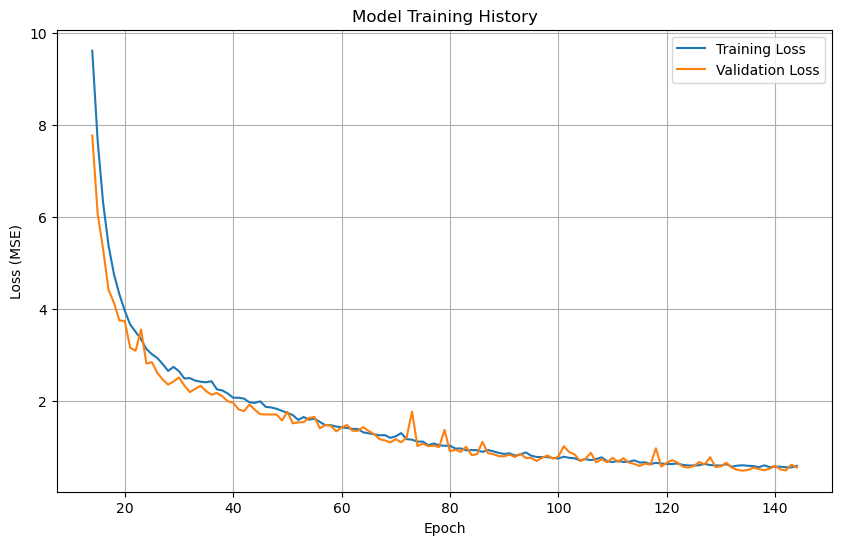

In [13]:

small_model_hidden_layers = [10,10,10]  # Example: two hidden layers with 10 neurons each
# Test the MLP model with the specified hidden layers
small_model, history, losses = test_mlp_model(small_model_hidden_layers,
                                              X_train_2_input, y_train_2_input,
                                              X_val_2_input, y_val_2_input,
                                              X_test_2_input, y_test_2_input,
                                              X_test_mid_range_2_input, Y_test_mid_range_2_input,
                                              X_test_long_range_2_input, Y_test_long_range_2_input,
                                              epochs=500, batch_size=32, verbose=1, 
                                              l2_reg=0.0, plot_history=True)

# # Create the model using the function defined previously
# small_model2 = create_mlp_model(small_model_hidden_layers, input_size=2)

# # Define the EarlyStopping callback
# # Monitor validation loss and stop if it doesn't improve for 'patience' epochs
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# # Train the model
# # Use validation data to monitor performance during training
# history = small_model2.fit(
#     X_train_2_input,
#     y_train_2_input,
#     epochs=100, # You can adjust the number of epochs
#     batch_size=32, # You can adjust the batch size
#     validation_data=(X_val_2_input, y_val_2_input),
#     callbacks=[early_stopping], # Add the EarlyStopping callback here
#     verbose=1 # Set to 1 or 2 for more detailed output during training
# )

### Test over a wide range of networks depths and sizes

Testing 1 layers with 10 neurons per layer...


Model: "mlp_model with_1_hidden_layers of sizes [10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1141.8751 - val_loss: 984.1308
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1007.5558 - val_loss: 836.8951
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 848.6431 - val_loss: 667.7944
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 643.0145 - val_loss: 470.8959
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 430.7982 - val_loss: 290.0280
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 274.3163 - val_loss: 159.6685
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 146.1372 - val_loss: 87.4701
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 82.2333 - val_loss: 57.2289
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 54.2871 - val_loss: 47.6164
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 48.1017 - val_loss: 45.4949
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 45.8359 - val_loss: 45.1782
Epoc

Model: "mlp_model with_1_hidden_layers of sizes [25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1030.6495 - val_loss: 870.3231
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 835.2716 - val_loss: 643.8827
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 607.2017 - val_loss: 404.6773
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 356.1872 - val_loss: 207.1642
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 175.8924 - val_loss: 98.9414
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 86.8397 - val_loss: 59.6008
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 59.1151 - val_loss: 50.5285
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 50.1612 - val_loss: 48.7434
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 47.5361 - val_loss: 48.2145
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 49.0655 - val_loss: 47.7230
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 49.0066 - val_loss: 47.4431
Epoch 12/

Model: "mlp_model with_1_hidden_layers of sizes [50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1006.1157 - val_loss: 696.0474
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 608.0082 - val_loss: 284.5325
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 224.1639 - val_loss: 77.0863
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 67.8598 - val_loss: 45.9983
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 46.2483 - val_loss: 45.1393
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 46.6513 - val_loss: 45.0864
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 46.2748 - val_loss: 45.2748
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 45.6538 - val_loss: 45.2115
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 45.3932 - val_loss: 45.1082
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 47.0467 - val_loss: 45.3411
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 46.5768 - val_loss: 45.2123
Epoch 12/100


Model: "mlp_model with_1_hidden_layers of sizes [75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1013.2620 - val_loss: 667.9484
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 556.4403 - val_loss: 221.6223
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 170.2648 - val_loss: 56.7888
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 54.7626 - val_loss: 45.8131
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 46.2820 - val_loss: 45.6720
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 45.6265 - val_loss: 45.7610
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48.3475 - val_loss: 45.6434
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 45.2835 - val_loss: 45.3597
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 46.2718 - val_loss: 45.5123
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 47.7539 - val_loss: 45.1937
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 46.9266 - val_loss: 45.2356
Epoch 12/100


Model: "mlp_model with_1_hidden_layers of sizes [100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1051.5454 - val_loss: 615.5829
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 476.7473 - val_loss: 113.7298
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 78.7846 - val_loss: 45.8403
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 45.7663 - val_loss: 45.4079
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 46.0640 - val_loss: 45.2192
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 45.7936 - val_loss: 45.2655
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 46.3669 - val_loss: 45.4858
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 45.3209 - val_loss: 45.1148
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 46.1309 - val_loss: 45.2503
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 45.8374 - val_loss: 45.1192
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 45.6190 - val_loss: 45.1529
Epoch 12/100
1

Model: "mlp_model with_2_hidden_layers of sizes [10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1063.1023 - val_loss: 745.7817
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 673.6274 - val_loss: 304.1810
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 229.4074 - val_loss: 68.2698
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 64.2794 - val_loss: 49.9502
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 54.0512 - val_loss: 47.8544
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 50.5578 - val_loss: 46.4109
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48.6581 - val_loss: 45.4017
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 46.4744 - val_loss: 44.8617
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 45.3121 - val_loss: 43.9684
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 44.8899 - val_loss: 44.1133
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 45.7571 - val_loss: 42.9199
Epoch 12/100


Model: "mlp_model with_2_hidden_layers of sizes [25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 751 (2.93 KB)

 Trainable params: 751 (2.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 903.5547 - val_loss: 268.2650
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 174.2847 - val_loss: 51.5012
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 51.7708 - val_loss: 47.0609
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 47.5301 - val_loss: 45.9257
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 47.5797 - val_loss: 45.8279
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 46.9608 - val_loss: 45.1262
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 44.8168 - val_loss: 43.6404
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 44.8053 - val_loss: 42.3741
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 44.3952 - val_loss: 42.3414
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 42.4118 - val_loss: 39.9387
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 41.5987 - val_loss: 39.3901
Epoch 12/100
188

Model: "mlp_model with_2_hidden_layers of sizes [50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751 (10.75 KB)

 Trainable params: 2,751 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 837.0065 - val_loss: 54.9090
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 57.5393 - val_loss: 47.5789
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 48.0640 - val_loss: 46.2304
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 46.6753 - val_loss: 45.1730
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 45.1713 - val_loss: 44.8485
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 45.8688 - val_loss: 42.2100
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 42.4908 - val_loss: 38.4886
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 37.6015 - val_loss: 35.2186
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 35.3668 - val_loss: 29.8572
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 29.2524 - val_loss: 21.4130
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21.3657 - val_loss: 15.1069
Epoch 12/100
188/1

Model: "mlp_model with_2_hidden_layers of sizes [75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,001 (23.44 KB)

 Trainable params: 6,001 (23.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 716.7512 - val_loss: 50.4490
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 48.8612 - val_loss: 46.4795
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 48.7654 - val_loss: 46.0897
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 47.5840 - val_loss: 46.4020
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 46.8737 - val_loss: 43.2258
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 43.3573 - val_loss: 39.6277
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 39.0577 - val_loss: 37.3239
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 36.1173 - val_loss: 31.0499
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 29.1136 - val_loss: 22.2525
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 21.0467 - val_loss: 13.8524
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 14.0036 - val_loss: 8.4987
Epoch 12/100
188/18

Model: "mlp_model with_2_hidden_layers of sizes [100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,501 (41.02 KB)

 Trainable params: 10,501 (41.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 694.7400 - val_loss: 48.2185
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 50.4189 - val_loss: 47.7351
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 49.4515 - val_loss: 46.1660
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 46.6249 - val_loss: 43.5129
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 44.3844 - val_loss: 41.6679
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 38.5486 - val_loss: 33.3211
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 32.4525 - val_loss: 25.9235
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 21.2652 - val_loss: 12.7720
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11.3667 - val_loss: 5.8195
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0470 - val_loss: 3.0805
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.1940 - val_loss: 2.2370
Epoch 12/100
188/188 ━━

Model: "mlp_model with_3_hidden_layers of sizes [10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1062.9453 - val_loss: 703.2815
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 503.6177 - val_loss: 81.9491
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 77.7617 - val_loss: 53.2874
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 54.5603 - val_loss: 49.7525
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 50.0254 - val_loss: 47.3818
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 49.8056 - val_loss: 45.9622
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 46.2670 - val_loss: 42.4277
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 42.9138 - val_loss: 38.9179
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 39.4429 - val_loss: 34.3773
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 35.3531 - val_loss: 29.9425
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 29.0584 - val_loss: 25.7028
Epoch 12/100
18

Model: "mlp_model with_3_hidden_layers of sizes [25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401 (5.47 KB)

 Trainable params: 1,401 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 900.6937 - val_loss: 58.1534
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 54.7846 - val_loss: 47.9844
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 49.3242 - val_loss: 46.7006
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 46.7942 - val_loss: 46.5317
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 46.5780 - val_loss: 43.3826
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 43.8759 - val_loss: 43.0993
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 42.6350 - val_loss: 38.7196
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 38.2192 - val_loss: 32.6535
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 32.0412 - val_loss: 28.3509
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 28.7513 - val_loss: 21.7895
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 22.6349 - val_loss: 16.5450
Epoch 12/100
188/1

Model: "mlp_model with_3_hidden_layers of sizes [50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 745.7971 - val_loss: 49.1632
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 50.0478 - val_loss: 52.0741
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 48.0502 - val_loss: 44.0921
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 45.3505 - val_loss: 45.8304
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 43.1459 - val_loss: 39.4246
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 36.1376 - val_loss: 26.5481
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 21.1230 - val_loss: 9.0088
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8137 - val_loss: 5.2807
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.3324 - val_loss: 2.3866
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.3956 - val_loss: 1.4062
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7487 - val_loss: 1.2263
Epoch 12/100
188/188 ━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,701 (45.71 KB)

 Trainable params: 11,701 (45.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 545.0474 - val_loss: 50.7976
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 50.0836 - val_loss: 52.5666
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 46.7598 - val_loss: 41.6619
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 37.5820 - val_loss: 26.6807
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 18.6013 - val_loss: 5.4462
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1475 - val_loss: 2.7909
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4969 - val_loss: 1.4276
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7688 - val_loss: 1.3062
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4182 - val_loss: 0.6734
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8503 - val_loss: 0.8622
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7215 - val_loss: 0.8158
Epoch 12/100
188/188 ━━━━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,601 (80.47 KB)

 Trainable params: 20,601 (80.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 531.6723 - val_loss: 50.4411
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 51.8279 - val_loss: 45.8768
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 48.2369 - val_loss: 41.1284
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 41.8164 - val_loss: 30.5469
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 28.4390 - val_loss: 12.3252
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10.2468 - val_loss: 7.1829
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3164 - val_loss: 2.3517
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0858 - val_loss: 1.2917
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1761 - val_loss: 0.7523
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7912 - val_loss: 0.6982
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5923 - val_loss: 0.5132
Epoch 12/100
188/188 ━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1071.6353 - val_loss: 655.5316
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 445.5949 - val_loss: 68.4834
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 63.5140 - val_loss: 51.2814
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 53.8525 - val_loss: 46.5886
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 47.1757 - val_loss: 42.3653
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 43.3953 - val_loss: 40.4291
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 39.8440 - val_loss: 35.2877
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 36.2502 - val_loss: 31.4454
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 32.4984 - val_loss: 27.7065
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 27.8292 - val_loss: 23.9561
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 23.5170 - val_loss: 20.4676
Epoch 12/100
18

Model: "mlp_model with_4_hidden_layers of sizes [25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,051 (8.01 KB)

 Trainable params: 2,051 (8.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 867.1776 - val_loss: 57.2890
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 55.8644 - val_loss: 47.6963
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 49.7377 - val_loss: 47.3985
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 44.6460 - val_loss: 38.4165
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 38.6857 - val_loss: 32.4484
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 33.0462 - val_loss: 23.6587
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 22.5511 - val_loss: 15.3726
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 15.4862 - val_loss: 11.4107
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.6270 - val_loss: 7.0198
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.9567 - val_loss: 4.2357
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2805 - val_loss: 3.3228
Epoch 12/100
188/188 ━━━

Model: "mlp_model with_4_hidden_layers of sizes [50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,851 (30.67 KB)

 Trainable params: 7,851 (30.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 642.7559 - val_loss: 52.2082
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 51.1326 - val_loss: 44.4364
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 47.8107 - val_loss: 46.8243
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 41.5111 - val_loss: 38.9337
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 36.1809 - val_loss: 25.4522
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 18.9995 - val_loss: 9.2857
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.5325 - val_loss: 4.6589
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.2296 - val_loss: 1.6181
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8834 - val_loss: 1.4542
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0624 - val_loss: 1.5902
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9161 - val_loss: 0.8307
Epoch 12/100
188/188 ━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,401 (67.97 KB)

 Trainable params: 17,401 (67.97 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 495.9593 - val_loss: 47.1771
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 47.7750 - val_loss: 41.2390
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 41.3858 - val_loss: 25.8713
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 16.8258 - val_loss: 6.7806
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.2284 - val_loss: 3.5146
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.5376 - val_loss: 1.1032
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.5248 - val_loss: 1.2284
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0065 - val_loss: 0.5046
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.7748 - val_loss: 0.8715
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6311 - val_loss: 0.3516
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3788 - val_loss: 0.2438
Epoch 12/100
188/188 ━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,701 (119.93 KB)

 Trainable params: 30,701 (119.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 457.0223 - val_loss: 56.8818
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 50.0145 - val_loss: 57.2170
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 44.9004 - val_loss: 24.7094
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 20.9286 - val_loss: 6.6046
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.2560 - val_loss: 1.4169
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.1430 - val_loss: 1.0312
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.8631 - val_loss: 0.8672
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5992 - val_loss: 0.3969
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6146 - val_loss: 0.9139
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5363 - val_loss: 0.4684
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6919 - val_loss: 0.2696
Epoch 12/100
188/188 ━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 873.9721 - val_loss: 72.8206
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 67.7880 - val_loss: 51.0580
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 50.6076 - val_loss: 46.2344
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 47.0882 - val_loss: 42.2463
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 41.7341 - val_loss: 38.8535
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 39.0045 - val_loss: 34.4544
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 33.8829 - val_loss: 28.9580
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28.4409 - val_loss: 22.7410
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21.8750 - val_loss: 18.0430
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 15.9293 - val_loss: 11.3809
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11.2737 - val_loss: 8.8738
Epoch 12/100
188/18

Model: "mlp_model with_5_hidden_layers of sizes [25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 763.4242 - val_loss: 57.2802
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 52.0336 - val_loss: 44.0857
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 45.6610 - val_loss: 37.4303
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 38.2104 - val_loss: 31.0311
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 30.5487 - val_loss: 19.3115
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 18.1994 - val_loss: 11.8929
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 11.1663 - val_loss: 8.3214
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4225 - val_loss: 4.3811
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.5312 - val_loss: 2.5390
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.2223 - val_loss: 2.1437
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3723 - val_loss: 1.4817
Epoch 12/100
188/188 ━━

Model: "mlp_model with_5_hidden_layers of sizes [50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 635.5228 - val_loss: 51.9012
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 48.4146 - val_loss: 41.6360
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 39.8522 - val_loss: 21.5670
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 18.1079 - val_loss: 12.4566
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.4226 - val_loss: 3.0220
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.0205 - val_loss: 2.2036
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.6520 - val_loss: 0.8578
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.9472 - val_loss: 0.6018
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.7759 - val_loss: 0.5621
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.9605 - val_loss: 0.6468
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5734 - val_loss: 1.2633
Epoch 12/100
188/188 ━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,101 (90.24 KB)

 Trainable params: 23,101 (90.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 539.4707 - val_loss: 55.8521
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 51.6395 - val_loss: 46.0304
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 43.8250 - val_loss: 36.2043
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 26.4643 - val_loss: 8.5768
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.9817 - val_loss: 2.9254
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.9873 - val_loss: 0.8578
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.1439 - val_loss: 0.8251
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.9445 - val_loss: 2.9235
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.7935 - val_loss: 0.4720
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4213 - val_loss: 0.4204
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4662 - val_loss: 0.4114
Epoch 12/100
188/188 ━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,801 (159.38 KB)

 Trainable params: 40,801 (159.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 416.3745 - val_loss: 59.8705
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 51.4050 - val_loss: 43.2894
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 39.0353 - val_loss: 20.3512
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 15.3753 - val_loss: 9.4089
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 5.8727 - val_loss: 2.9307
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.9234 - val_loss: 1.1328
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.0578 - val_loss: 0.3273
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7163 - val_loss: 3.7153
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.3636 - val_loss: 0.8243
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6613 - val_loss: 0.1475
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4765 - val_loss: 0.4186
Epoch 12/100
188/188 ━

Model: "mlp_model with_6_hidden_layers of sizes [10, 10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 943.8329 - val_loss: 73.0932
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 67.3957 - val_loss: 55.1404
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 55.1360 - val_loss: 49.1341
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 48.9674 - val_loss: 45.9279
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 48.0660 - val_loss: 41.8839
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 41.8111 - val_loss: 38.4562
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 39.0611 - val_loss: 33.8578
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 33.6977 - val_loss: 28.7562
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 30.0790 - val_loss: 21.9292
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 20.9386 - val_loss: 15.4454
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 14.8448 - val_loss: 9.9048
Epoch 12/1

Model: "mlp_model with_6_hidden_layers of sizes [25, 25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,351 (13.09 KB)

 Trainable params: 3,351 (13.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 672.0674 - val_loss: 49.6383
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 49.7998 - val_loss: 44.3419
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 46.9937 - val_loss: 38.5942
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 37.6279 - val_loss: 23.7933
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 20.8856 - val_loss: 10.5150
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 10.0682 - val_loss: 5.3870
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.5981 - val_loss: 3.3858
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.9399 - val_loss: 3.6949
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.6079 - val_loss: 1.2562
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.5518 - val_loss: 3.0043
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.6056 - val_loss: 1.4303
Epoch 12/100
188/1

Model: "mlp_model with_6_hidden_layers of sizes [50, 50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,951 (50.59 KB)

 Trainable params: 12,951 (50.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 538.4405 - val_loss: 49.3800
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 47.6102 - val_loss: 41.3510
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 39.8121 - val_loss: 28.4453
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 23.3871 - val_loss: 10.0075
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 7.2891 - val_loss: 5.1970
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.8620 - val_loss: 1.4468
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.2384 - val_loss: 0.9827
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.1457 - val_loss: 0.7770
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.7191 - val_loss: 0.8556
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.0105 - val_loss: 1.5893
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.1848 - val_loss: 0.6493
Epoch 12/100
188/188 ━━━━

Model: "mlp_model with_6_hidden_layers of sizes [75, 75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,801 (112.50 KB)

 Trainable params: 28,801 (112.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 490.3055 - val_loss: 51.8411
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 54.5426 - val_loss: 44.8849
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 40.2019 - val_loss: 26.1373
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 20.2818 - val_loss: 14.0227
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.9234 - val_loss: 3.4303
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.9451 - val_loss: 1.6945
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.2507 - val_loss: 1.5395
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.4803 - val_loss: 0.3637
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5384 - val_loss: 0.6866
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.6418 - val_loss: 0.9677
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.1442 - val_loss: 0.9472
Epoch 12/100
188/188 

Model: "mlp_model with_6_hidden_layers of sizes [100, 100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,901 (198.83 KB)

 Trainable params: 50,901 (198.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 456.3507 - val_loss: 57.7774
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 51.2122 - val_loss: 36.9911
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 36.9574 - val_loss: 17.9403
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 10.3541 - val_loss: 4.8333
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 3.6140 - val_loss: 0.6087
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8969 - val_loss: 0.8061
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.3076 - val_loss: 0.5625
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.3405 - val_loss: 0.4232
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7495 - val_loss: 1.6041
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.6206 - val_loss: 0.7175
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.8471 - val_loss: 0.9808
Epoch 12/100
188/188 ━

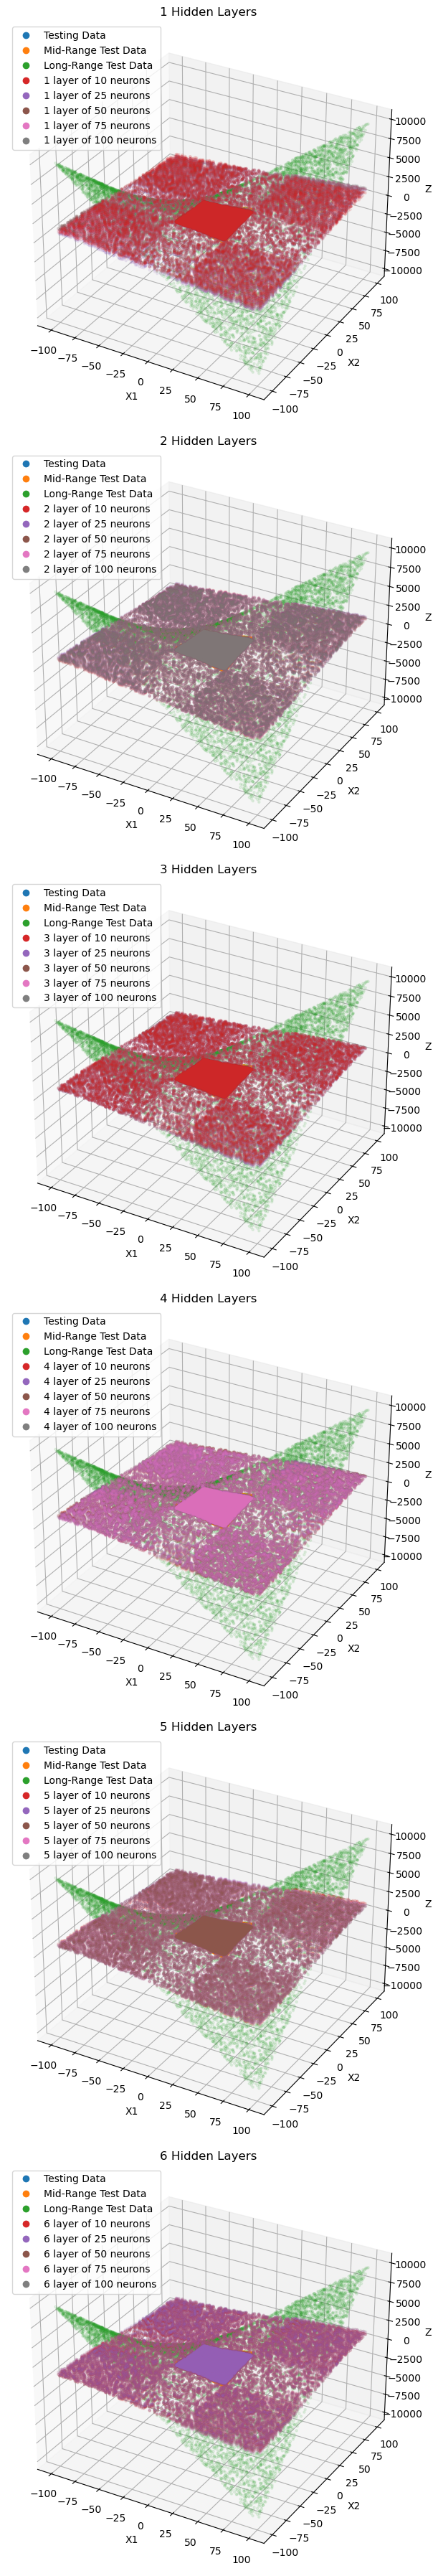


--- Test Results Summary ---
    num_layers  neurons_per_layer  loss_on_range  loss_mid_range  \
0            1                 10      18.088026    21062.291016   
1            1                 25       5.070357    14304.002930   
2            1                 50       0.302711    10722.793945   
3            1                 75       0.144656    10249.138672   
4            1                100       0.076601     8477.789062   
5            2                 10       1.191239    12286.995117   
6            2                 25       0.172007    10015.324219   
7            2                 50       0.055193    11281.152344   
8            2                 75       0.058117    10147.316406   
9            2                100       0.060698    11388.682617   
10           3                 10       0.684810    14570.526367   
11           3                 25       0.202070    13523.802734   
12           3                 50       0.137946    13990.820312   
13           3    

In [14]:
# Define the range of hidden layers and neurons per layer to test
num_layers_list = range(1, 7) # 1 to 6 hidden layers
neurons_list = [10, 25, 50, 75, 100] # Number of neurons in each layer

# List to store results
results_list = []
loss_on_range_2_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_mid_range_2_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_long_range_2_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)

# Create a figure and a set of subplots
fig = plt.figure(figsize=(12, 6 * len(num_layers_list)))
# ax = fig.add_subplot(111, projection='3d')
# fig, axes = plt.subplots(len(num_layers_list), 1, figsize=(12, 6 * len(num_layers_list)), projection='3d')
total_x_range = np.concatenate((X_test_2_input, X_test_mid_range_2_input, X_test_long_range_2_input))
# total_y_range = np.concatenate((y_test_2_input, Y_test_mid_range_2_input, Y_test_long_range_2_input)) # This variable is not used in the plot

# Loop through each combination of layers and neurons
for i, num_layers in enumerate(num_layers_list):

    # Get the correct axes object based on the number of subplots
    if len(num_layers_list) == 1:
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = fig.add_subplot(len(num_layers_list), 1, num_layers, projection='3d')

    # Plot the static data points with low alpha
    handles, labels = ax.get_legend_handles_labels()
    real_data = ax.scatter(X_test_2_input[:, 0], X_test_2_input[:, 1], y_test_2_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Testing Data')
    handles.append(dummy_handle)
    labels.append(f'Testing Data')
    real_data = ax.scatter(X_test_mid_range_2_input[:, 0], X_test_mid_range_2_input[:, 1], Y_test_mid_range_2_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Mid-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Mid-Range Test Data')
    real_data = ax.scatter(X_test_long_range_2_input[:, 0], X_test_long_range_2_input[:, 1], Y_test_long_range_2_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Long-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Long-Range Test Data')

    # Lists to store handles and labels for the legend
    # Get handles/labels from static data plots first
    handles, labels = ax.get_legend_handles_labels()

    for neurons_per_layer in neurons_list:
        print(f"Testing {num_layers} layers with {neurons_per_layer} neurons per layer...")

        # Define the hidden layer sizes for the current configuration
        hidden_layer_sizes = [neurons_per_layer] * num_layers

        # Create the model using the function defined previously
        # Note: create_mlp_model prints model summary, which will appear for each model
        model, history, losses = test_mlp_model(hidden_layer_sizes,
                                                X_train_2_input, y_train_2_input,
                                                X_val_2_input, y_val_2_input,
                                                X_test_2_input, y_test_2_input,
                                                X_test_mid_range_2_input, Y_test_mid_range_2_input,
                                                X_test_long_range_2_input, Y_test_long_range_2_input,
                                                epochs=100, batch_size=32, verbose=1, 
                                                l2_reg=0.0, plot_history=False)
        
        
        loss_on_range_2_input.loc[num_layers, neurons_per_layer] = losses['on range']
        loss_mid_range_2_input.loc[num_layers, neurons_per_layer] = losses['mid range']
        loss_long_range_2_input.loc[num_layers, neurons_per_layer] = losses['long range']

        # plot the test results with low alpha
        scatter_pred = ax.scatter(total_x_range[:, 0], total_x_range[:, 1], model.predict(total_x_range, verbose=0), alpha=0.1, s=5)

        # Get the color used for this scatter plot
        color = scatter_pred.get_facecolor()[0]

        # Create a dummy plot element with alpha=1.0 for the legend handle
        # Use a line plot with a marker for the legend handle
        dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'{num_layers} layer of {neurons_per_layer} neurons')

        # Add the dummy handle and label to the lists
        handles.append(dummy_handle)
        labels.append(f'{num_layers} layer of {neurons_per_layer} neurons')


        # Store the results in a dictionary
        results_list.append({
            'num_layers': num_layers,
            'neurons_per_layer': neurons_per_layer,
            'loss_on_range': losses['on range'],
            'loss_mid_range': losses['mid range'],
            'loss_long_range': losses['long range']
        })

    # # Set the y-axis to log scale
    # ax.set_yscale('log')

    # Add labels and title
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')
    # ax.set_ylabel('Y (log scale)') # Update label to reflect log scale
    ax.set_title(f'{num_layers} Hidden Layers')

    # Add the legend using the collected handles and labels
    ax.legend(handles=handles, labels=labels)

    ax.grid(True)

plt.tight_layout()
plt.show()

# Convert the list of results into a pandas DataFrame
results_df = pd.DataFrame(results_list)

# Display the resulting DataFrame
print("\n--- Test Results Summary ---")
print(results_df)

#### Compare predictions errors on range and out of range

Text(70.72222222222221, 0.5, 'Number of Hidden Layers')

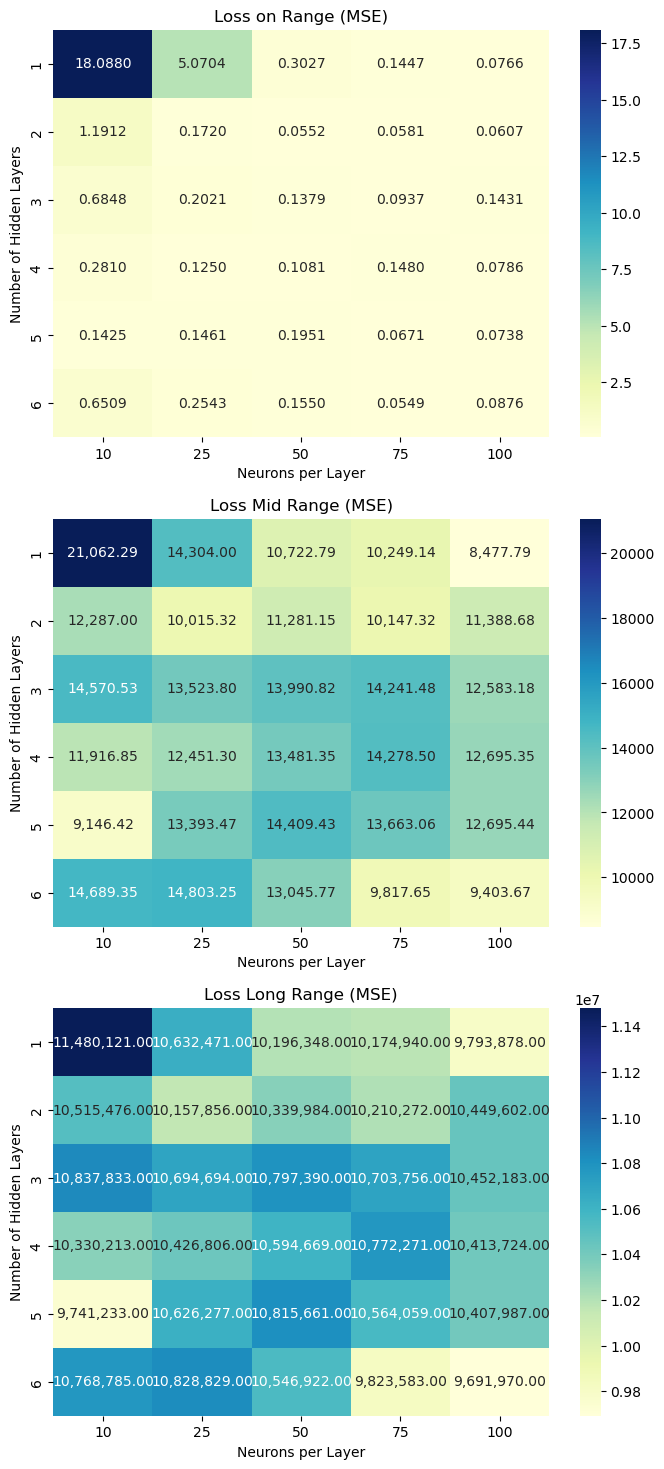

In [15]:
# loss_on_range.info()
# loss_mid_range
# loss_long_range

fig, axes = plt.subplots(3, 1, figsize=(8, 3 * len(num_layers_list)))

sns.heatmap(loss_on_range_2_input, annot=True, fmt=",.4f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Loss on Range (MSE)")
axes[0].set_xlabel("Neurons per Layer")
axes[0].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_mid_range_2_input, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Loss Mid Range (MSE)")
axes[1].set_xlabel("Neurons per Layer")
axes[1].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_long_range_2_input, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Loss Long Range (MSE)")
axes[2].set_xlabel("Neurons per Layer")
axes[2].set_ylabel("Number of Hidden Layers")
# plt.show()


### Two inputs conclusion

The results we got for the two inputs case are similar to the ones we got on the one input case.
We see no strong corelation between network size or depth to its quality and a little better corelation between layers size and quality.

And the out-of-range results are also similar, showing no generalization, and also displaying linear interpolation of the closest points that doesn't really work for the truly non-linear function we had as an hidden function.

## Total conclusions

The results we got from this work are showing that the difference between network sizes and depths is pretty minor, unlike what was said in the past meetup, but similar to what was said, normal neural network can't (or at least have big troubles) generalize truly non-linear functions for out-of-range data.